<a href="https://colab.research.google.com/github/papagorgio23/Python101/blob/master/NLP_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade gensim

     |████████████████████████████████| 24.2MB 1.2MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
!pip install nlpia

     |████████████████████████████████| 32.0MB 144kB/s 
     |████████████████████████████████| 716kB 60.9MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
  Created wheel for pypandoc: filename=pypandoc-1.4-cp36-none-any.whl size=16718 sha256=b32b6233244817155c838e304f6e607c0129f58df4b01d8ded6bbba32a4795c5
  Stored in directory: /root/.cache/pip/wheels/3e/55/4f/59e0fa0914f3db52e87c0642c5fb986871dfbbf253026e639f
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144676 sha256=7c05758ac2c49bbd499123cf2f21aaeaa39616280db10d540986989dd0cc9fda
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built pypandoc python-Levenshtein


In [ ]:
## data wrangling
import pandas as pd
import numpy as np

## plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt

## misc
import json
import datetime
import warnings
warnings.filterwarnings("ignore")
import pickle
from collections import Counter



## Deep Learning
import keras

## pre-processing
from sklearn.model_selection import train_test_split 
from keras.utils.np_utils import to_categorical 

## models
from keras import models
from keras.models import Sequential

## layers
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

## word embedding
import gensim.downloader as api

## optimizer
from keras.optimizers import Adam

## evaluating model
from keras.callbacks import ReduceLROnPlateau
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import plot_model

Using TensorFlow backend.


## Load Data

In [ ]:
## twitter data
data_url = "https://raw.githubusercontent.com/papagorgio23/GamblingTwitter_Bot/master/Data/RNN_Data1.csv"
data = pd.read_csv(data_url)

In [ ]:
data.head()

,screen_name,text
0,SportsCheetah,clippers 47 blazers 40 at the half:\n\npor x2 ...
1,ClevTA,looking at l assit 10 years of data. home te...
2,PlusEVAnalytics,how good is jambos? the answer is really a con...
3,LeeSharpeNFL,afc:\n(1) bal\n(2) ne\n(3) kc\n(4) hou\n(5) bu...
4,adamchernoff,heads: 50 percent / ev\ntails: 50 percent / ...


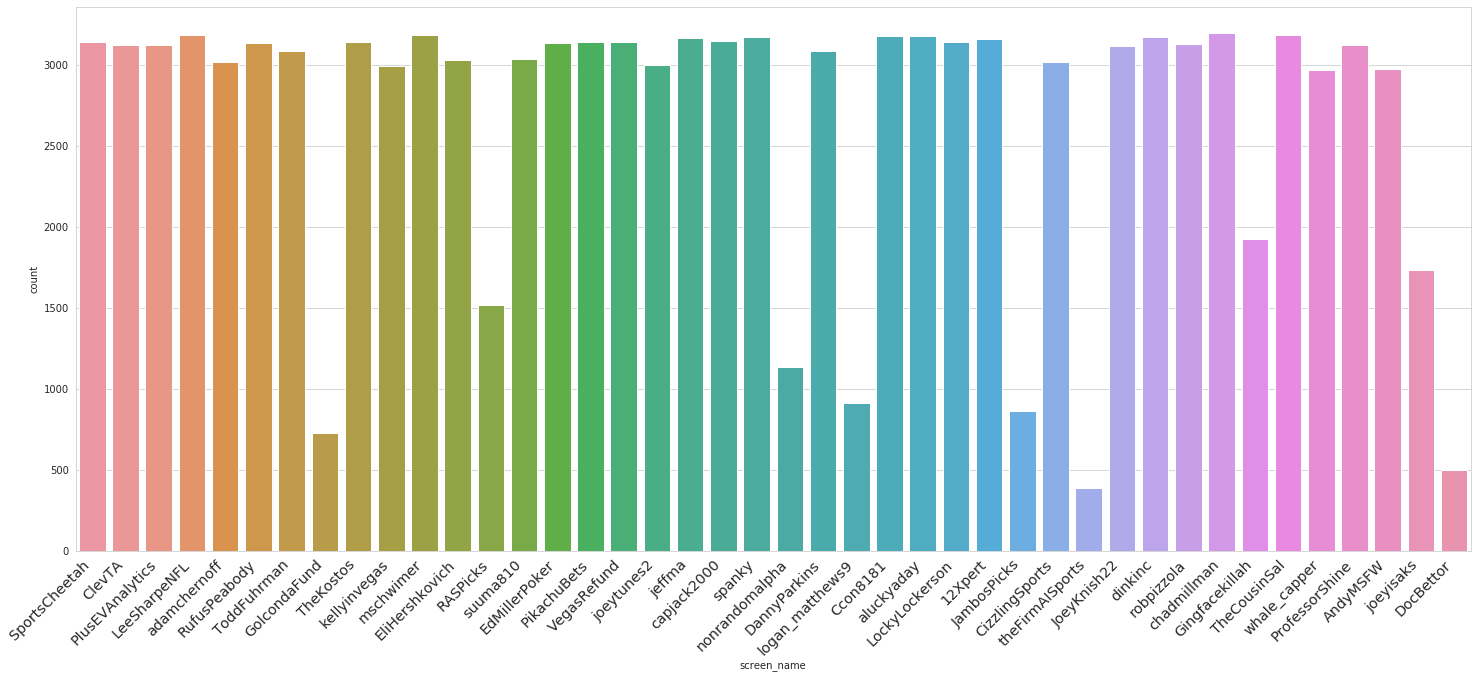

In [ ]:
plt.figure(figsize = (25, 10))
ax = sns.countplot(x="screen_name", data=data)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);

In [ ]:
# Length of tweets
data['Tweet_length'] = data['Text_Parsed_1'].str.len()

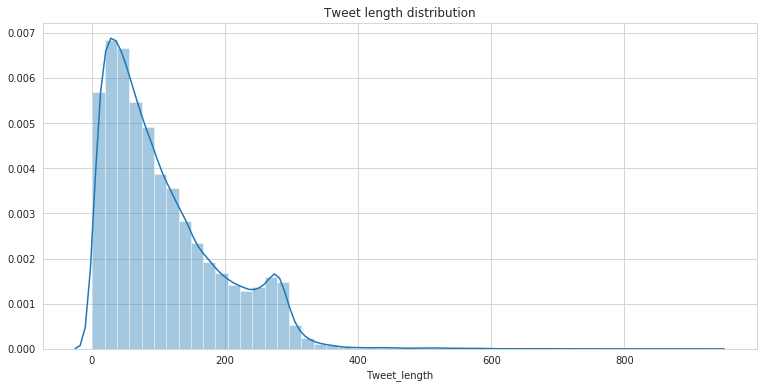

In [ ]:
plt.figure(figsize=(12.8,6))
sns.distplot(data['Tweet_length']).set_title('Tweet length distribution');

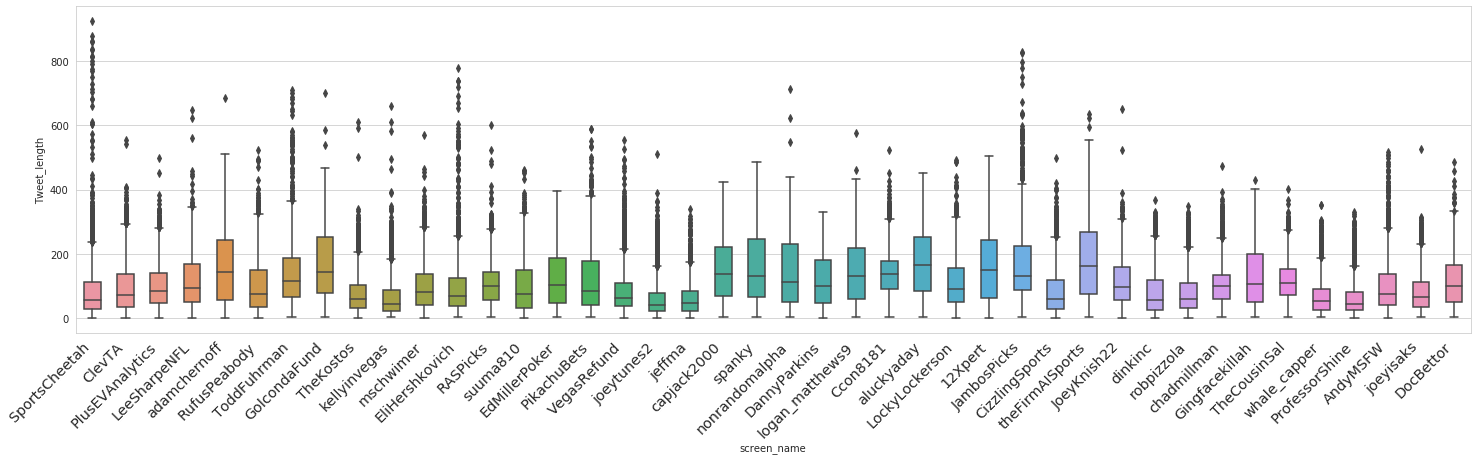

In [ ]:
plt.figure(figsize=(25,6))
sns.boxplot(data=data, x='screen_name', y='Tweet_length', width=.5)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);

In [ ]:
# @username, links, \r and \n 
data['Text_Parsed_1'] = data['text'].str.replace('@[^\s]+', " ")
data['Text_Parsed_1'] = data['Text_Parsed_1'].str.replace("http\S+", " ")
data['Text_Parsed_1'] = data['Text_Parsed_1'].str.replace("#", " hashtag ")
data['Text_Parsed_1'] = data['Text_Parsed_1'].str.replace("%", " percent ")
data['Text_Parsed_1'] = data['Text_Parsed_1'].str.replace(" - ", " ")
data['Text_Parsed_1'] = data['Text_Parsed_1'].str.replace("pts", " points ")
data['Text_Parsed_1'] = data['Text_Parsed_1'].str.replace("reb", " rebounds ")
data['Text_Parsed_1'] = data['Text_Parsed_1'].str.replace("w/", " with ")
data['Text_Parsed_1'] = data['Text_Parsed_1'].str.replace("w/o", " without ")
data['Text_Parsed_1'] = data['Text_Parsed_1'].str.replace("w/out", " without ")
data['Text_Parsed_1'] = data['Text_Parsed_1'].str.replace("o/u", " over under ")
data['Text_Parsed_1'] = data['Text_Parsed_1'].str.replace("-[0-9]", " favored by some points ")
data['Text_Parsed_1'] = data['Text_Parsed_1'].str.replace("\+[0-9]", " underdog by some points ")
data['Text_Parsed_1'] = data['Text_Parsed_1'].str.replace("\n", " ")
data['Text_Parsed_1'] = data['Text_Parsed_1'].str.replace("    ", " ")

In [ ]:
data.head()

,screen_name,text,Tweet_length,Text_Parsed_1
0,SportsCheetah,clippers 47 blazers 40 at the half:\n\npor x2 ...,430,clippers 47 blazers 40 at the half: por x2 po...
1,ClevTA,looking at l assit 10 years of data. home te...,405,looking at l assit 10 years of data. home te...
2,PlusEVAnalytics,how good is jambos? the answer is really a con...,431,how good is jambos? the answer is really a con...
3,LeeSharpeNFL,afc:\n(1) bal\n(2) ne\n(3) kc\n(4) hou\n(5) bu...,289,afc: (1) bal (2) ne (3) kc (4) hou (5) buf (6)...
4,adamchernoff,heads: 50 percent / ev\ntails: 50 percent / ...,394,heads: 50 percent / ev tails: 50 percent / e...


In [ ]:
print("Raw:      ", data.loc[1]['text'])
print()
print()
print("Cleaned:  ", data.loc[1]['Text_Parsed_1'])


Raw:       looking at l assit  10  years of data. home teams on  thursday night football  have a 60 percent  win percent . home favs win 74 percent  and ats home favs are 57.4 percent . on sunday gms the l assit  10  years home teams have an overall win percent  of 57 percent . home favs win 68 percent  and home favs ats is only 48 percent . so anecdotally home teams have an adv on  thursday night football  v sun


Cleaned:   looking at l assit  10  years of data. home teams on  thursday night football  have a 60 percent  win percent . home favs win 74 percent  and ats home favs are 57.4 percent . on sunday gms the l assit  10  years home teams have an overall win percent  of 57 percent . home favs win 68 percent  and home favs ats is only 48 percent . so anecdotally home teams have an adv on  thursday night football  v sun


# Load Pre-Trained Word Embeddings

In [ ]:

info = api.info()
print(json.dumps(info, indent=4))

{
    "corpora": {
        "semeval-2016-2017-task3-subtaskBC": {
            "num_records": -1,
            "record_format": "dict",
            "file_size": 6344358,
            "reader_code": "https://github.com/RaRe-Technologies/gensim-data/releases/download/semeval-2016-2017-task3-subtaskB-eng/__init__.py",
            "license": "All files released for the task are free for general research use",
            "fields": {
                "2016-train": [
                    "..."
                ],
                "2016-dev": [
                    "..."
                ],
                "2017-test": [
                    "..."
                ],
                "2016-test": [
                    "..."
                ]
            },
            "description": "SemEval 2016 / 2017 Task 3 Subtask B and C datasets contain train+development (317 original questions, 3,169 related questions, and 31,690 comments), and test datasets in English. The description of the tasks and the collect

#### List of Models

In [ ]:
for model_name, model_data in sorted(info['models'].items()):
    print(
        '%s (%d records): %s' % (
            model_name,
            model_data.get('num_records', -1),
            model_data['description'][:40] + '...',
        )
    )

__testing_word2vec-matrix-synopsis (-1 records): [THIS IS ONLY FOR TESTING] Word vecrors ...
conceptnet-numberbatch-17-06-300 (1917247 records): ConceptNet Numberbatch consists of state...
fasttext-wiki-news-subwords-300 (999999 records): 1 million word vectors trained on Wikipe...
glove-twitter-100 (1193514 records): Pre-trained vectors based on  2B tweets,...
glove-twitter-200 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-twitter-25 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-twitter-50 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-wiki-gigaword-100 (400000 records): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-200 (400000 records): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-300 (400000 records): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-50 (400000 records): Pre-trained vectors based on Wikipedia 2...
word2vec-google-news-300 (3000000 records): Pre-trai

### Word2Vec Model

In [ ]:
model = api.load("word2vec-google-news-300")
model.most_similar("glass")

[=================================================-] 99.4% 1652.2/1662.8MB downloaded


[('R._Mazzei_fused', 0.6665399074554443),
 ('Christian_Audigier_nightclub', 0.6632694602012634),
 ('copper_alloy_garnets', 0.6343655586242676),
 ('Nelmeus', 0.6274422407150269),
 ('fiber_fusion_splicing', 0.6229820251464844),
 ('Plexiglass', 0.585858941078186),
 ('slashing_Leonardo_DiCaprio', 0.5850011110305786),
 ('plexiglass', 0.5823023319244385),
 ('Plexiglas', 0.5803930759429932),
 ("#Q'##_unaudited", 0.5798528790473938)]

In [ ]:
model.most_similar("glass")

[('R._Mazzei_fused', 0.6665399074554443),
 ('Christian_Audigier_nightclub', 0.6632694602012634),
 ('copper_alloy_garnets', 0.6343655586242676),
 ('Nelmeus', 0.6274422407150269),
 ('fiber_fusion_splicing', 0.6229820251464844),
 ('Plexiglass', 0.585858941078186),
 ('slashing_Leonardo_DiCaprio', 0.5850011110305786),
 ('plexiglass', 0.5823023319244385),
 ('Plexiglas', 0.5803930759429932),
 ("#Q'##_unaudited", 0.5798528790473938)]

### Glove Model

I will be using the GloVe Twitter pretrained model with 200 dimensions  
or possibly the 25 dimension model

In [ ]:
model_25 = api.load("glove-twitter-25")

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
model_200 = api.load("glove-twitter-200")
model.most_similar("glass")

[==================================================] 100.0% 104.8/104.8MB downloaded


[('lamp', 0.9047179222106934),
 ('wood', 0.9034247398376465),
 ('oz', 0.8972457051277161),
 ('sand', 0.8971636891365051),
 ('paint', 0.8952186107635498),
 ('leaf', 0.8941252827644348),
 ('bottle', 0.8934361934661865),
 ('umbrella', 0.8917711973190308),
 ('steel', 0.8896211385726929),
 ('tree', 0.8895832300186157)]

In [ ]:
model.most_similar("imo")

[('definately', 0.7175354957580566),
 ('IMHO', 0.7061859369277954),
 ('thats', 0.7053737044334412),
 ('tho', 0.6917688846588135),
 ('i_dont', 0.6723967790603638),
 ('tbh', 0.6701918840408325),
 ('definitly', 0.6576553583145142),
 ('definetly', 0.6545764207839966),
 ('lol', 0.6535724997520447),
 ('dos_santos', 0.6497949361801147)]

In [ ]:
model_25.get_vector("football")

array([ 0.36491  ,  0.46657  , -0.64874  , -1.6317   , -0.10499  ,
        0.29539  ,  1.102    , -0.37133  , -0.37283  , -0.80927  ,
        0.18891  ,  0.31195  , -4.1618   ,  0.65512  ,  1.4357   ,
       -0.0057378, -0.3075   , -1.2917   , -0.39751  ,  0.65063  ,
       -0.83692  ,  0.68736  ,  0.19409  , -1.3879   , -0.064282 ],
      dtype=float32)

In [ ]:
texts = [
        ["this", "is", "just", "a", "test", "too"],
        ["maybe", "the", "nfl", "will", "get", "shutdown", "too"],
        ["I'll", "bet", "on", "the", "49ers", "tonight"]
]

labels = [
         ["Rufus"],
         ["Jeff Ma"],
         ["A.I. Sports"]
]

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 10  # We will cut reviews after 100 words
training_samples = 3  # We will be training on 200 samples
validation_samples = 10000  # We will be validating on 10,000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
#indices = np.arange(data.shape[0])
#np.random.shuffle(indices)
#data = data[indices]
#labels = labels[indices]

#x_train = data[:training_samples]
#y_train = labels[:training_samples]
#x_val = data[training_samples: training_samples + validation_samples]
#y_val = labels[training_samples: training_samples + validation_samples]

Found 17 unique tokens.
Shape of data tensor: (3, 10)
Shape of label tensor: (3, 1)


In [ ]:
embedding_dim = 300

embedding_matrix = np.zeros((max_words, embedding_dim))


In [ ]:
data

array([[ 0,  0,  0,  0,  2,  3,  4,  5,  6,  7],
       [ 0,  0,  0,  8,  1,  9, 10, 11, 12, 13],
       [ 0,  0,  0,  0, 14, 15, 16,  1, 17, 18]], dtype=int32)

In [ ]:
labels

array([['Rufus'],
       ['Jeff Ma'],
       ['A.I. Sports']], dtype='<U11')

In [ ]:
len(model_25.vocab.keys())

1193514

In [ ]:
embedding_dim = 25
max_words = 19
embedding_matrix = np.zeros((max_words, embedding_dim))

In [ ]:
word_index

{'49ers': 17,
 'a': 5,
 'bet': 15,
 'get': 11,
 "i'll": 14,
 'is': 3,
 'just': 4,
 'maybe': 8,
 'nfl': 9,
 'on': 16,
 'shutdown': 12,
 'test': 6,
 'the': 1,
 'this': 2,
 'tonight': 18,
 'too': 7,
 'too!': 13,
 'will': 10}

In [ ]:
nb_words = min(max_words, len(word_index))

# randomized weights for missing words... !??
embedding_matrix = (np.random.rand(nb_words, embedding_dim) - 0.5) / 5.0
len(embedding_matrix)

17

In [ ]:
for word, i in word_index.items():
    if i >= max_features: continue
    if word in model_25:
        embedding_vector = model_25.get_vector(word)
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-4.66980010e-01,  4.02990013e-01,  1.20209999e-01,
        -2.94049992e-03, -2.06420004e-01,  4.59199995e-01,
         1.67840004e+00,  8.08390006e-02, -7.65190005e-01,
         8.48719999e-02, -1.10679996e+00,  5.34560025e-01,
        -4.86420012e+00, -4.42369998e-01,  1.10529996e-01,
        -4.75320011e-01,  4.30530012e-01, -1.25020003e+00,
        -3.04309994e-01, -4.09599990e-01,  3.03079993e-01,
         5.34770012e-01, -8.51990003e-03,  1.29999995e+00,
        -2.18850002e-01],
    

# DNN

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model_dnn = Sequential(name = "Dense Neural Network")
model_dnn.add(Embedding(max_words, embedding_dim, input_length=maxlen, name = "GloVe_Twitter-25"))
model_dnn.add(Flatten())
model_dnn.add(Dense(32, activation='relu'))
model_dnn.add(Dense(42, activation='softmax'))

## Freeze the embedding weights equal to our pretrained model
model_dnn.layers[0].set_weights([embedding_matrix])
model_dnn.layers[0].trainable = False

model_dnn.summary()

Model: "Dense Neural Network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
GloVe_Twitter (Embedding)    (None, 10, 25)            475       
_________________________________________________________________
flatten_15 (Flatten)         (None, 250)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 32)                8032      
_________________________________________________________________
dense_34 (Dense)             (None, 42)                1386      
Total params: 9,893
Trainable params: 9,418
Non-trainable params: 475
_________________________________________________________________


In [ ]:
model_dnn.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model_dnn.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model_dnn.save_weights('pre_trained_glove_model.h5')

# 1D CNN

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) 

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


Loading data...
17465344/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop


model_cnn = Sequential(name="1D_Convolutional_Neural_Network")
model_cnn.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model_cnn.add(layers.Conv1D(32, 7, activation='relu'))
model_cnn.add(layers.MaxPooling1D(2))
model_cnn.add(layers.Conv1D(32, 7, activation='relu'))
model_cnn.add(layers.GlobalMaxPooling1D())
model_cnn.add(layers.Dense(1))

## Freeze the embedding weights equal to our pretrained model
model_cnn.layers[0].set_weights([embedding_matrix])
model_cnn.layers[0].trainable = False

# print model summary
model_cnn.summary()

model_cnn.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])



ValueError: ignored

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

# RNN

In [ ]:
# define model
model_rnn = Sequential(name="Recurrnet_Neural_Network")
model_rnn.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model_rnn.add(LSTM(100, return_sequences=True))
model_rnn.add(LSTM(100))
model_rnn.add(Dense(100, activation='relu'))
model_rnn.add(Dense(42, activation='softmax'))

## Freeze the embedding weights equal to our pretrained model
model_rnn.layers[0].set_weights([embedding_matrix])
model_rnn.layers[0].trainable = False

# print model summary
model_rnn.summary()

NameError: ignored